# Home Credit Default Risk

## **Explore Berau Dataset**

**Import Dataset**

In [1]:
!pip install pandas
!pip install openpyxl
from IPython.display import Image, display

import pandas as pd
import numpy as np

import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
HC_bureau = pd.read_csv('HC_bureau.csv')

In [3]:
HC_bureau.head(5)

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [4]:
HC_bureau.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB


## **Bureau - Join - Bureau Balance**

In [3]:
HC_application_train = pd.read_csv('HC_application_train.csv')

In [3]:
HC_bureau_balance = pd.read_csv('HC_bureau_balance.csv')

In [9]:
HC_bureau_balance.head(5)

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [10]:
HC_bureau_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   SK_ID_BUREAU    int64 
 1   MONTHS_BALANCE  int64 
 2   STATUS          object
dtypes: int64(2), object(1)
memory usage: 624.8+ MB


In [4]:
train_bureau = HC_bureau.merge(HC_bureau_balance, on='SK_ID_BUREAU', how='inner')
print(train_bureau.shape)

(24179741, 19)


In [12]:
train_bureau.head(5)

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY,MONTHS_BALANCE,STATUS
0,380361,5715448,Active,currency 1,-820,0,31069.0,NaN,NaN,0,67500.0,0.0,67500.0,0.0,Credit card,-183,0.0,0,C
1,380361,5715448,Active,currency 1,-820,0,31069.0,NaN,NaN,0,67500.0,0.0,67500.0,0.0,Credit card,-183,0.0,-1,C
2,380361,5715448,Active,currency 1,-820,0,31069.0,NaN,NaN,0,67500.0,0.0,67500.0,0.0,Credit card,-183,0.0,-2,C
3,380361,5715448,Active,currency 1,-820,0,31069.0,NaN,NaN,0,67500.0,0.0,67500.0,0.0,Credit card,-183,0.0,-3,C
4,380361,5715448,Active,currency 1,-820,0,31069.0,NaN,NaN,0,67500.0,0.0,67500.0,0.0,Credit card,-183,0.0,-4,C


In [13]:
train_bureau.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24179741 entries, 0 to 24179740
Data columns (total 19 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
 17  MONTHS_BALANCE          int64  
 18  STATUS                  object 
dtypes: float64(8), int64(7), object(4)
memory usage: 3.4+ GB


**Check all values in the features**

In [14]:
list_item = []
for col in train_bureau.columns:
    list_item.append([col, train_bureau[col].dtype, train_bureau[col].isna().sum(),
                      100 * train_bureau[col].isna().sum() / len(train_bureau[col]),
                      train_bureau[col].nunique(), train_bureau[col].unique()])
desc_df = pd.DataFrame(data=list_item,
                       columns=['feature', 'data_type', 'null_num', 'null_persen', 'unique_num', 'unique_sample'])
desc_df

,feature,data_type,null_num,null_persen,unique_num,unique_sample
0,SK_ID_CURR,int64,0,0.000000,134542,"[380361, 125263, 275240, 399518, 215382, 40108..."
1,SK_ID_BUREAU,int64,0,0.000000,774354,"[5715448, 5715449, 5715451, 5715452, 5715453, ..."
2,CREDIT_ACTIVE,object,0,0.000000,4,"[Active, Closed, Sold, Bad debt]"
3,CREDIT_CURRENCY,object,0,0.000000,4,"[currency 1, currency 2, currency 3, currency 4]"
4,DAYS_CREDIT,int64,0,0.000000,2923,"[-820, -357, -917, -993, -1146, -1622, -2631, ..."
5,CREDIT_DAY_OVERDUE,int64,0,0.000000,410,"[0, 30, 1777, 150, 18, 37, 67, 7, 26, 9, 12, 8..."
6,DAYS_CREDIT_ENDDATE,float64,1177501,4.869783,12405,"[31069.0, 1119.0, -187.0, 31039.0, 681.0, -107..."
7,DAYS_ENDDATE_FACT,float64,5628643,23.278343,2893,"[nan, -759.0, -831.0, -780.0, -1073.0, -1096.0..."
8,AMT_CREDIT_MAX_OVERDUE,float64,17545903,72.564479,32076,"[nan, 0.0, 10634.355, 2132.82, 1440.0, 36630.0..."
9,CNT_CREDIT_PROLONG,int64,0,0.000000,10,"[0, 1, 3, 2, 4, 5, 9, 8, 6, 7]"


**Statistical values of the numerical features**

In [15]:
pd.set_option('display.float_format', '{:.2f}'.format)

train_bureau.describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,24179741.00,278001.82,102884.74,100001.00,188787.00,277654.00,367376.00,456255.00
SK_ID_BUREAU,24179741.00,6035775.23,493778.66,5001710.00,5729922.00,6070693.00,6432644.00,6842888.00
DAYS_CREDIT,24179741.00,-1592.58,758.04,-2922.00,-2275.00,-1548.00,-989.00,0.00
CREDIT_DAY_OVERDUE,24179741.00,0.87,38.45,0.00,0.00,0.00,0.00,2792.00
DAYS_CREDIT_ENDDATE,23002240.00,-9.53,4830.98,-42060.00,-1663.00,-909.00,-61.00,31131.00
DAYS_ENDDATE_FACT,18551098.00,-1273.33,712.68,-42023.00,-1810.00,-1193.00,-708.00,0.00
AMT_CREDIT_MAX_OVERDUE,6633838.00,6119.99,385190.60,0.00,0.00,0.00,0.00,115987185.00
CNT_CREDIT_PROLONG,24179741.00,0.01,0.10,0.00,0.00,0.00,0.00,9.00
AMT_CREDIT_SUM,24179736.00,339459.20,1483039.00,0.00,48964.50,117000.00,292500.00,585000000.00
AMT_CREDIT_SUM_DEBT,20090664.00,87653.97,612121.80,-2014753.46,0.00,0.00,0.00,170100000.00


**Check if there are any features with duplicate values :**

In [16]:
def check_duplicates(train_bureau):
    data_duplikat = train_bureau[train_bureau.duplicated()]
    if not data_duplikat.empty:
        print(f"Ada {len(data_duplikat)} baris yang duplikat.")
        print("\nBaris yang duplikat:")
        print(data_duplikat)
    else:
        print("Tidak ada data yang duplikat di dataset.")
check_duplicates(train_bureau)

Tidak ada data yang duplikat di dataset.


**Check if there are any features with missing values :**

In [17]:
# Mengecek apakah ada missing value di dataset
def check_missing_values(train_bureau):
    missing_values = train_bureau.isnull().sum()
    if missing_values.any():
        print("Kolom yang terdapat missing value:")
        print(missing_values[missing_values > 0])
    else:
        print("Tidak ada missing value di dataset.")
check_missing_values(train_bureau)

Kolom yang terdapat missing value:
DAYS_CREDIT_ENDDATE        1177501
DAYS_ENDDATE_FACT          5628643
AMT_CREDIT_MAX_OVERDUE    17545903
AMT_CREDIT_SUM                   5
AMT_CREDIT_SUM_DEBT        4089077
AMT_CREDIT_SUM_LIMIT      10376144
AMT_ANNUITY                9553957
dtype: int64


Total Baris : 24.179.741 <br>

DAYS_CREDIT_ENDDATE       1.177.501 baris data = 4,86% data <br>
DAYS_ENDDATE_FACT         5.628.643 baris data = 23,27% data <br>
AMT_CREDIT_MAX_OVERDUE    17.545.903 baris data = 72,56% data <br>
AMT_CREDIT_SUM            5 baris data = (-) <br>
AMT_CREDIT_SUM_DEBT       4.089.077 baris data = 16,91% data <br>
AMT_CREDIT_SUM_LIMIT      10.376.144 baris data = 42,91% data <br>
AMT_ANNUITY               9.553.957 baris data = 39,51% data <br>

**Filter features into categorical and numerical data types**

In [5]:
numeric=['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
train_bureau_num = train_bureau.select_dtypes(include=numeric)
train_bureau_num.head(3)

,SK_ID_CURR,SK_ID_BUREAU,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,AMT_ANNUITY,MONTHS_BALANCE
0,380361,5715448,-820,0,31069.0,NaN,NaN,0,67500.0,0.0,67500.0,0.0,-183,0.0,0
1,380361,5715448,-820,0,31069.0,NaN,NaN,0,67500.0,0.0,67500.0,0.0,-183,0.0,-1
2,380361,5715448,-820,0,31069.0,NaN,NaN,0,67500.0,0.0,67500.0,0.0,-183,0.0,-2


In [6]:
train_bureau_cat= train_bureau.select_dtypes(include='object')
train_bureau_cat.head(3)

,CREDIT_ACTIVE,CREDIT_CURRENCY,CREDIT_TYPE,STATUS
0,Active,currency 1,Credit card,C
1,Active,currency 1,Credit card,C
2,Active,currency 1,Credit card,C


**Outliers of the numerical features**

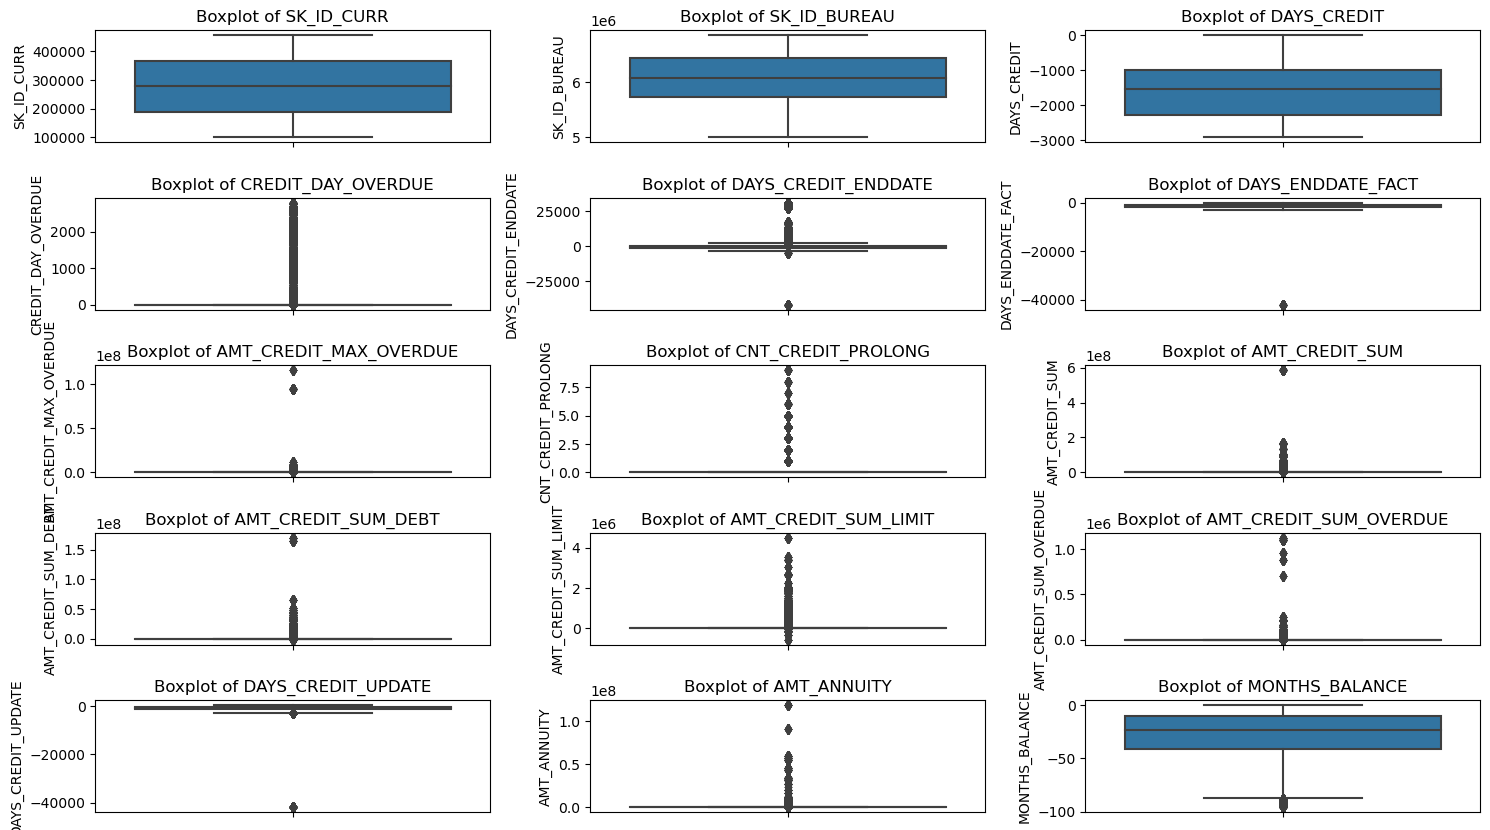

In [20]:
plt.figure(figsize=(15, 10))

for i, column in enumerate(train_bureau_num.columns):
    plt.subplot(len(train_bureau_num.columns)//3 + 1, 3, i + 1)  # Menyesuaikan grid
    sns.boxplot(data=train_bureau_num, y=column)  # Membuat boxplot untuk kolom
    plt.title(f'Boxplot of {column}')
    plt.ylabel(column)
    
plt.tight_layout()
plt.show()

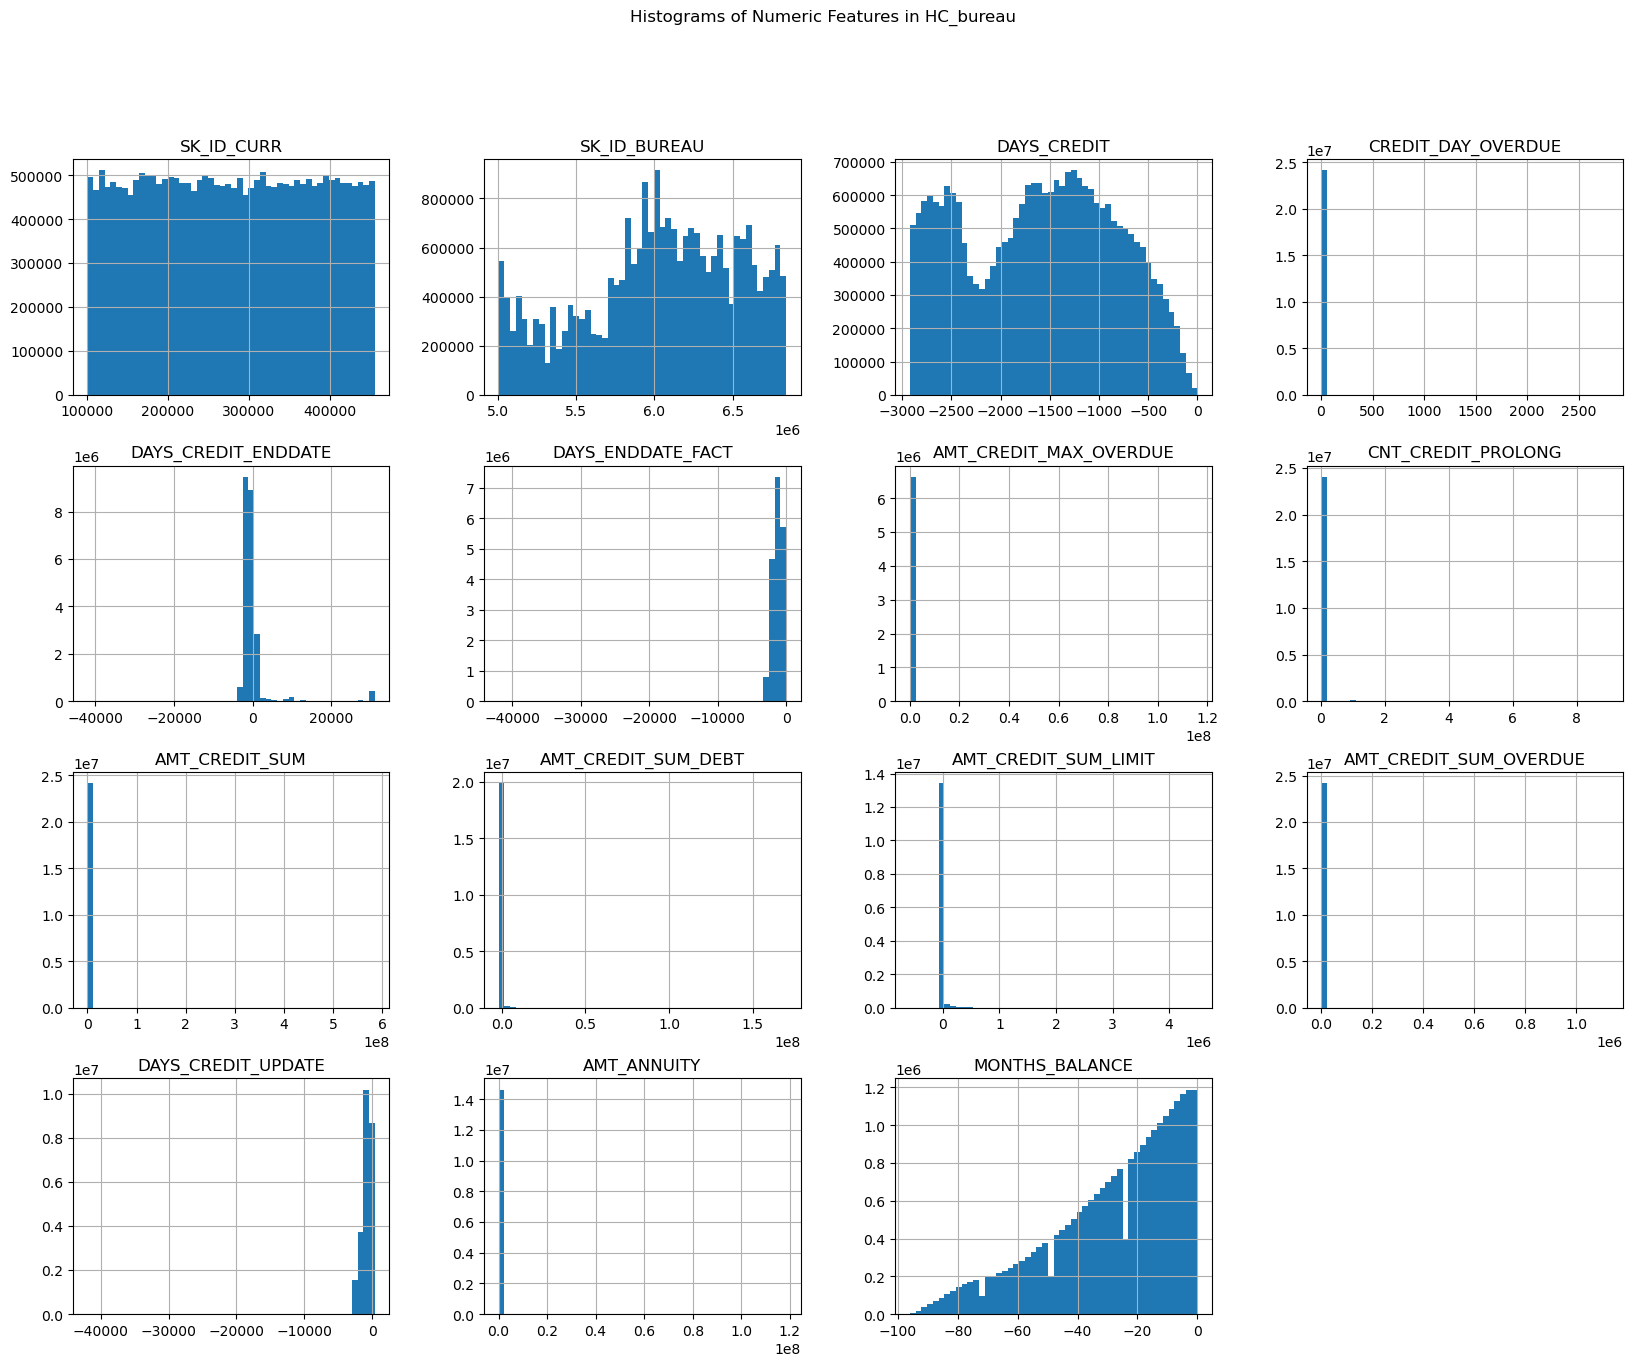

In [21]:
# Plot distribution of each numeric feature (histogram)
train_bureau_num.hist(bins=50, figsize=(20, 15))
plt.suptitle('Histograms of Numeric Features in HC_bureau')
plt.show()

**Correlation between Bureau features**

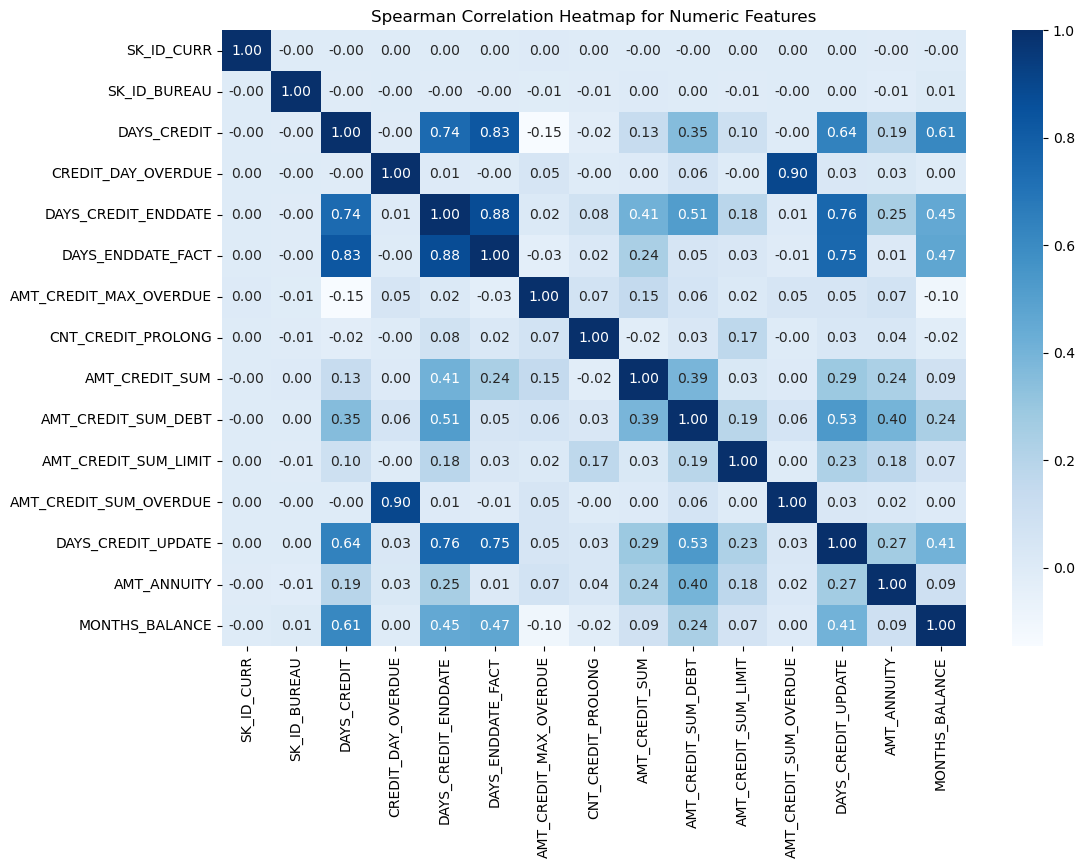

In [22]:
correlation_matrix_spearman = train_bureau_num.corr(method='spearman')

# Membuat heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_spearman, annot=True, cmap='Blues', fmt=".2f")
plt.title('Spearman Correlation Heatmap for Numeric Features')
plt.show()

## **Handling Missing Values**

In [23]:
# Mengecek apakah ada missing value di dataset
def check_missing_values(train_bureau):
    missing_values = train_bureau.isnull().sum()
    if missing_values.any():
        print("Kolom yang terdapat missing value:")
        print(missing_values[missing_values > 0])
    else:
        print("Tidak ada missing value di dataset.")
check_missing_values(train_bureau)

Kolom yang terdapat missing value:
DAYS_CREDIT_ENDDATE        1177501
DAYS_ENDDATE_FACT          5628643
AMT_CREDIT_MAX_OVERDUE    17545903
AMT_CREDIT_SUM                   5
AMT_CREDIT_SUM_DEBT        4089077
AMT_CREDIT_SUM_LIMIT      10376144
AMT_ANNUITY                9553957
dtype: int64


Total Baris : 24.179.741 <br>

DAYS_CREDIT_ENDDATE       1.177.501 baris data = 4,86% data <br>
DAYS_ENDDATE_FACT         5.628.643 baris data = 23,27% data <br>
AMT_CREDIT_MAX_OVERDUE    17.545.903 baris data = 72,56% data <br>
AMT_CREDIT_SUM            5 baris data = (-) <br>
AMT_CREDIT_SUM_DEBT       4.089.077 baris data = 16,91% data <br>
AMT_CREDIT_SUM_LIMIT      10.376.144 baris data = 42,91% data <br>
AMT_ANNUITY               9.553.957 baris data = 39,51% data <br>

**1. DAYS_CREDIT_ENDDATE** <br>
Jumlah hari hingga kredit seharusnya lunas. Jika nilainya negatif, artinya kredit tersebut sudah jatuh tempo; jika positif, itu menunjukkan waktu yang tersisa hingga kredit selesai dibayar. Jika nasabah mendekati batas waktu pelunasan dan memiliki utang besar, ini bisa menjadi indikator risiko.

Missing Values DAYS_CREDIT_ENDDATE sebanyak 1.177.501 baris data = 4,86% data

**Keputusan** <br>
Mengisi dengan nilai mean <br>

**2. DAYS_ENDDATE_FACT** <br>
Jumlah hari dari tanggal aplikasi hingga kredit tersebut sebenarnya dilunasi. Nilai negatif dalam kolom ini berarti bahwa pelunasan kredit terjadi di masa lalu. Semakin negatif angkanya, semakin lama waktu sejak kredit tersebut dilunasi. Jika terdapat nilai positif, ini berarti pelunasan kredit terjadi di masa depan, atau kredit masih aktif dan belum lunas.

Missing value DAYS_ENDDATE_FACT sebanyak 5.628.643 baris data = 23,27% data

**Keputusan** <br>
Mengisi dengan nilai mean <br>

**3. AMT_CREDIT_MAX_OVERDUE** <br>
Jumlah maksimum yang pernah tertunggak dari kredit ini. Ini mengukur besarnya tunggakan yang pernah terjadi pada nasabah terkait kredit tertentu. Tunggakan besar di masa lalu mungkin menjadi indikator risiko gagal bayar di masa depan.

Missing value AMT_CREDIT_MAX_OVERDUE sebanyak 17.545.903 baris data = 72,56% data

**Analisis:** <br>
Missing value sebanyak 72,56% menunjukkan bahwa sebagian besar nasabah tidak memiliki catatan tunggakan. <br>

**Keputusan** <br>
Mengisi dengan nilai mean <br>

**4. AMT_CREDIT_SUM** <br>
Total jumlah kredit yang dipinjamkan ke nasabah untuk kredit yang tercatat. Ini bisa berupa total pinjaman dari berbagai sumber atau produk kredit. Semakin besar jumlah pinjaman, semakin tinggi beban nasabah, yang bisa meningkatkan risiko gagal bayar.

Missing Value AMT_CREDIT_SUM sebanyak 5 baris.

**Keputusan** <br>
Mengisi dengan nilai mean <br>

**5. AMT_CREDIT_SUM_DEBT** <br>
Jumlah kredit yang masih terhutang (belum dibayar) oleh nasabah untuk kredit yang tercatat. Kolom ini menunjukkan seberapa besar utang nasabah saat ini. Nilai ini seharusnya bernilai positif atau nol, karena utang yang belum dilunasi biasanya memiliki nilai positif. Jika bernilai negatif, bisa saja kesalahan dalam entri data.

Missing Value AMT_CREDIT_SUM_DEBT sebanyak 4.089.077 baris data = 16,91% data

**Keputusan** <br>
Mengisi dengan nilai mean <br>

**6. AMT_CREDIT_SUM_LIMIT** <br>
Jumlah batas kredit yang diperbolehkan untuk kredit tertentu, seperti limit kartu kredit. Ini menunjukkan jumlah maksimum yang bisa dipinjam dalam kredit tertentu. Limit kredit dapat menunjukkan seberapa besar kepercayaan lembaga keuangan terhadap nasabah, yang bisa menjadi indikasi risiko gagal bayar jika limit sering terlampaui.

Missing Value AMT_CREDIT_SUM_LIMIT sebanyak 10.376.144 baris data = 42,91% data

**Keputusan** <br>
Mengisi dengan nilai mean <br>

**7. AMT_ANNUITY** <br>
Jumlah pembayaran tahunan yang harus dibayarkan oleh nasabah untuk kredit ini (angsuran kredit). Ini biasanya jumlah yang harus dibayar secara berkala (misalnya bulanan atau tahunan) berdasarkan persyaratan kredit. Beban pembayaran yang tinggi mungkin membuat nasabah sulit untuk melunasi pinjaman, meningkatkan risiko gagal bayar.

Missing Value AMT_ANNUITY sebanyak 9.553.957 baris data = 39,51% data

**Keputusan** <br>
Mengisi dengan nilai mean <br>

In [7]:
# Mengisi missing value pada masing-masing kolom dengan mean
train_bureau['DAYS_CREDIT_ENDDATE'].fillna(train_bureau['DAYS_CREDIT_ENDDATE'].median(), inplace=True)
train_bureau['DAYS_ENDDATE_FACT'].fillna(train_bureau['DAYS_ENDDATE_FACT'].median(), inplace=True)
train_bureau['AMT_CREDIT_MAX_OVERDUE'].fillna(train_bureau['AMT_CREDIT_MAX_OVERDUE'].median(), inplace=True)
train_bureau['AMT_CREDIT_SUM'].fillna(train_bureau['AMT_CREDIT_SUM'].median(), inplace=True)
train_bureau['AMT_CREDIT_SUM_DEBT'].fillna(train_bureau['AMT_CREDIT_SUM_DEBT'].median(), inplace=True)
train_bureau['AMT_CREDIT_SUM_LIMIT'].fillna(train_bureau['AMT_CREDIT_SUM_LIMIT'].median(), inplace=True)
train_bureau['AMT_ANNUITY'].fillna(train_bureau['AMT_ANNUITY'].median(), inplace=True)

In [8]:
# Mengecek apakah ada missing value di dataset
def check_missing_values(train_bureau):
    missing_values = train_bureau.isnull().sum()
    if missing_values.any():
        print("Kolom yang terdapat missing value:")
        print(missing_values[missing_values > 0])
    else:
        print("Tidak ada missing value di dataset.")
check_missing_values(train_bureau)

Tidak ada missing value di dataset.


## **Handling Outliers**

**Before Handling Outliers**

In [9]:
numeric=['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
train_bureau_num = train_bureau.select_dtypes(include=numeric)
train_bureau_num.head(3)

,SK_ID_CURR,SK_ID_BUREAU,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,AMT_ANNUITY,MONTHS_BALANCE
0,380361,5715448,-820,0,31069.0,-1193.0,0.0,0,67500.0,0.0,67500.0,0.0,-183,0.0,0
1,380361,5715448,-820,0,31069.0,-1193.0,0.0,0,67500.0,0.0,67500.0,0.0,-183,0.0,-1
2,380361,5715448,-820,0,31069.0,-1193.0,0.0,0,67500.0,0.0,67500.0,0.0,-183,0.0,-2


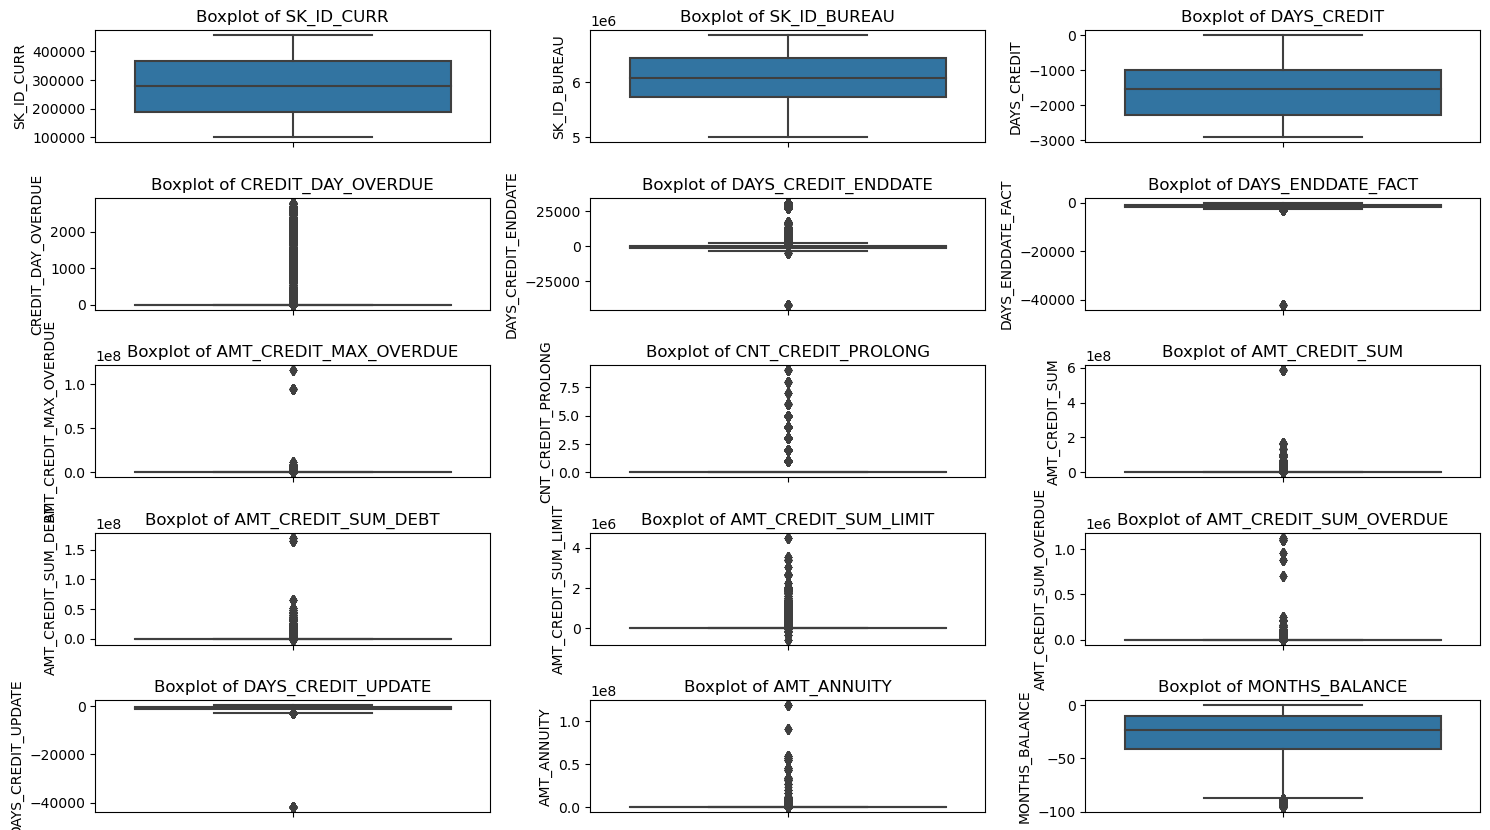

In [27]:
plt.figure(figsize=(15, 10))

for i, column in enumerate(train_bureau_num.columns):
    plt.subplot(len(train_bureau_num.columns)//3 + 1, 3, i + 1)  # Menyesuaikan grid
    sns.boxplot(data=train_bureau_num, y=column)  # Membuat boxplot untuk kolom
    plt.title(f'Boxplot of {column}')
    plt.ylabel(column)
    
plt.tight_layout()
plt.show()

**After Handling Outliers**

In [10]:
# Menghitung Q1 (25th percentile) dan Q3 (75th percentile)
Q1 = train_bureau_num.quantile(0.25)
Q3 = train_bureau_num.quantile(0.75)
IQR = Q3 - Q1

# Menyaring outliers dan mengganti dataframe aslinya (train_bureau_num)
train_bureau_num = train_bureau_num[~((train_bureau_num < (Q1 - 1.5 * IQR)) | 
                                      (train_bureau_num > (Q3 + 1.5 * IQR))).any(axis=1)]

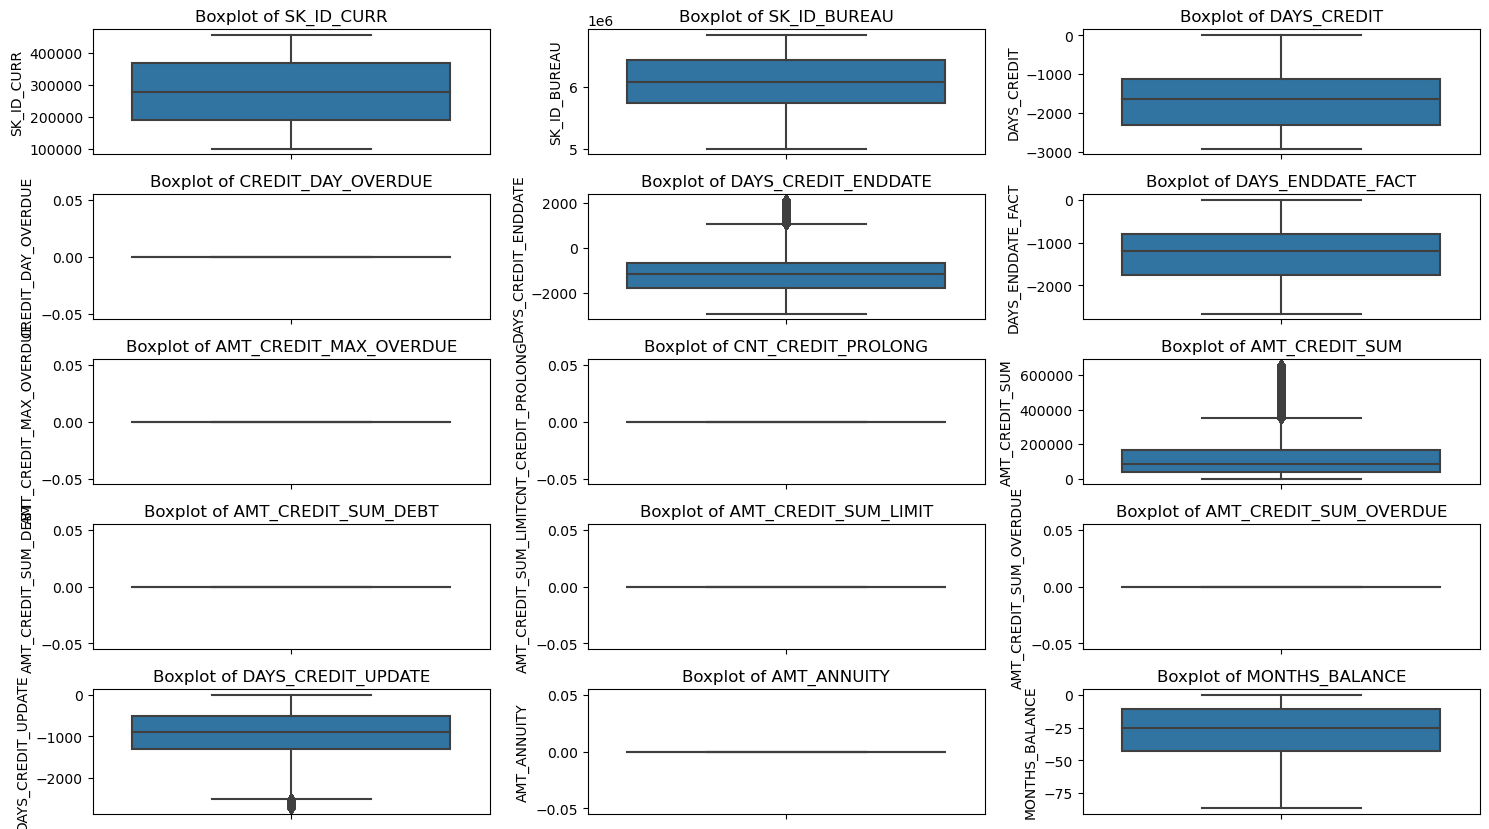

In [29]:
plt.figure(figsize=(15, 10))

for i, column in enumerate(train_bureau_num.columns):
    plt.subplot(len(train_bureau_num.columns)//3 + 1, 3, i + 1)  # Menyesuaikan grid
    sns.boxplot(data=train_bureau_num, y=column)  # Membuat boxplot untuk kolom
    plt.title(f'Boxplot of {column}')
    plt.ylabel(column)
    
plt.tight_layout()
plt.show()

## **Features Transformation**

### **Features Scaling**

In [11]:
# mengubah nilai MONTHS_BALANCE menjadi positif
train_bureau['MONTHS_BALANCE'] = train_bureau['MONTHS_BALANCE'] * -1

### **Handling Distribution Data**

**Before Handling Distribution Data**

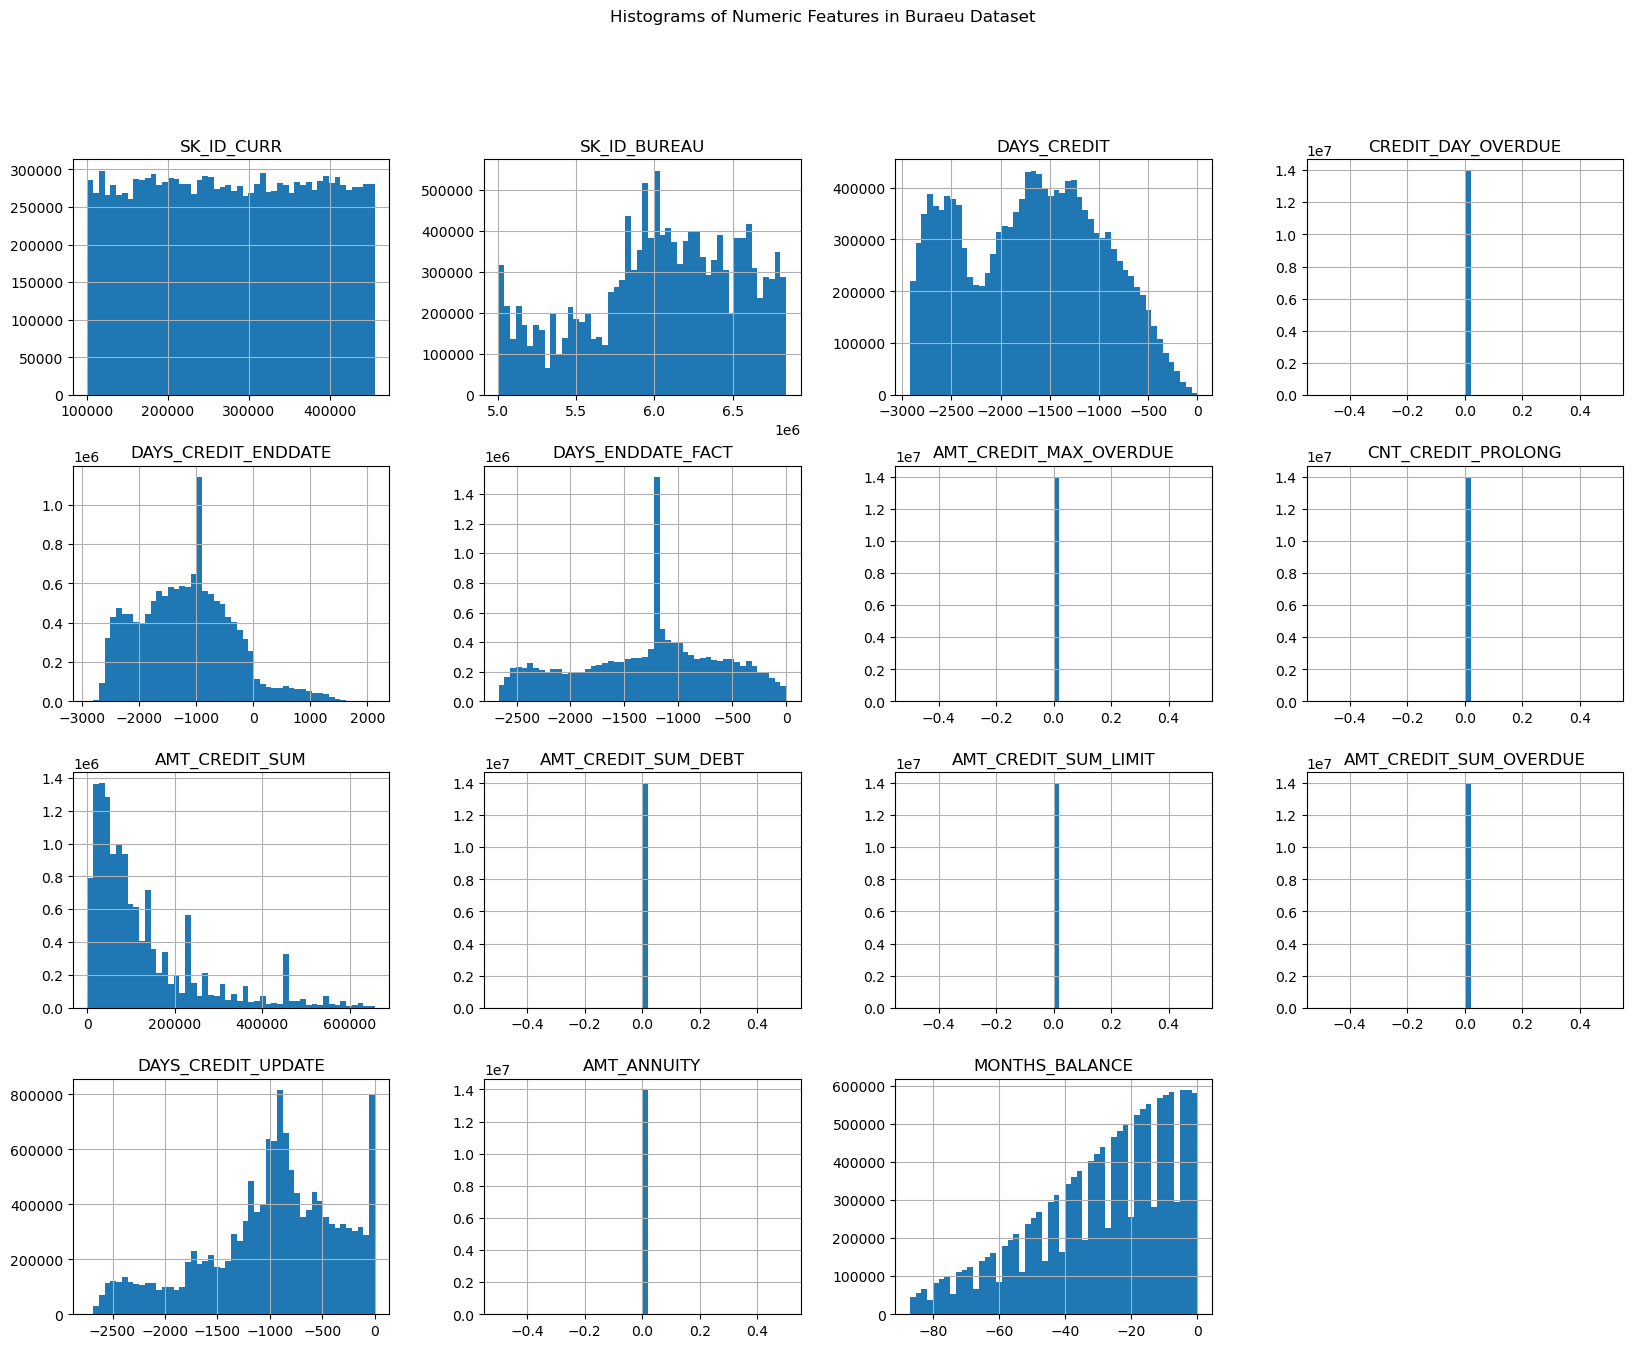

In [11]:
train_bureau_num.hist(bins=50, figsize=(20, 15))
plt.suptitle('Histograms of Numeric Features in Buraeu Dataset')
plt.show()

**After Handling Distribution Data**

In [12]:
import pandas as pd
from sklearn.preprocessing import PowerTransformer

# Daftar kolom yang akan ditransformasikan
cols_to_transform = [
    'DAYS_CREDIT', 'CREDIT_DAY_OVERDUE', 'DAYS_CREDIT_ENDDATE', 
    'DAYS_ENDDATE_FACT', 'AMT_CREDIT_MAX_OVERDUE', 'CNT_CREDIT_PROLONG', 
    'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT', 
    'AMT_CREDIT_SUM_OVERDUE', 'DAYS_CREDIT_UPDATE', 'AMT_ANNUITY']

# Inisialisasi transformer Yeo-Johnson
yeo_johnson = PowerTransformer(method='yeo-johnson')

# Terapkan Yeo-Johnson pada kolom yang dipilih
train_bureau[cols_to_transform] = yeo_johnson.fit_transform(train_bureau[cols_to_transform])

# Cek hasil transformasi
print(train_bureau.head())

   SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0      380361       5715448        Active      currency 1     1.001935   
1      380361       5715448        Active      currency 1     1.001935   
2      380361       5715448        Active      currency 1     1.001935   
3      380361       5715448        Active      currency 1     1.001935   
4      380361       5715448        Active      currency 1     1.001935   

   CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0           -0.045408             3.257779           0.015291   
1           -0.045408             3.257779           0.015291   
2           -0.045408             3.257779           0.015291   
3           -0.045408             3.257779           0.015291   
4           -0.045408             3.257779           0.015291   

   AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
0               -0.266219           -0.073363       -0.402839   
1               -0.266219         

In [15]:
numeric=['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
train_bureau_num = train_bureau.select_dtypes(include=numeric)
train_bureau_num.head(3)

,SK_ID_CURR,SK_ID_BUREAU,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,AMT_ANNUITY,MONTHS_BALANCE
0,380361,5715448,1.001935,-0.045408,3.257779,0.015291,-0.266219,-0.073363,-0.402839,-0.14442,2.100965,-0.044884,0.874566,-0.52119,0
1,380361,5715448,1.001935,-0.045408,3.257779,0.015291,-0.266219,-0.073363,-0.402839,-0.14442,2.100965,-0.044884,0.874566,-0.52119,-1
2,380361,5715448,1.001935,-0.045408,3.257779,0.015291,-0.266219,-0.073363,-0.402839,-0.14442,2.100965,-0.044884,0.874566,-0.52119,-2


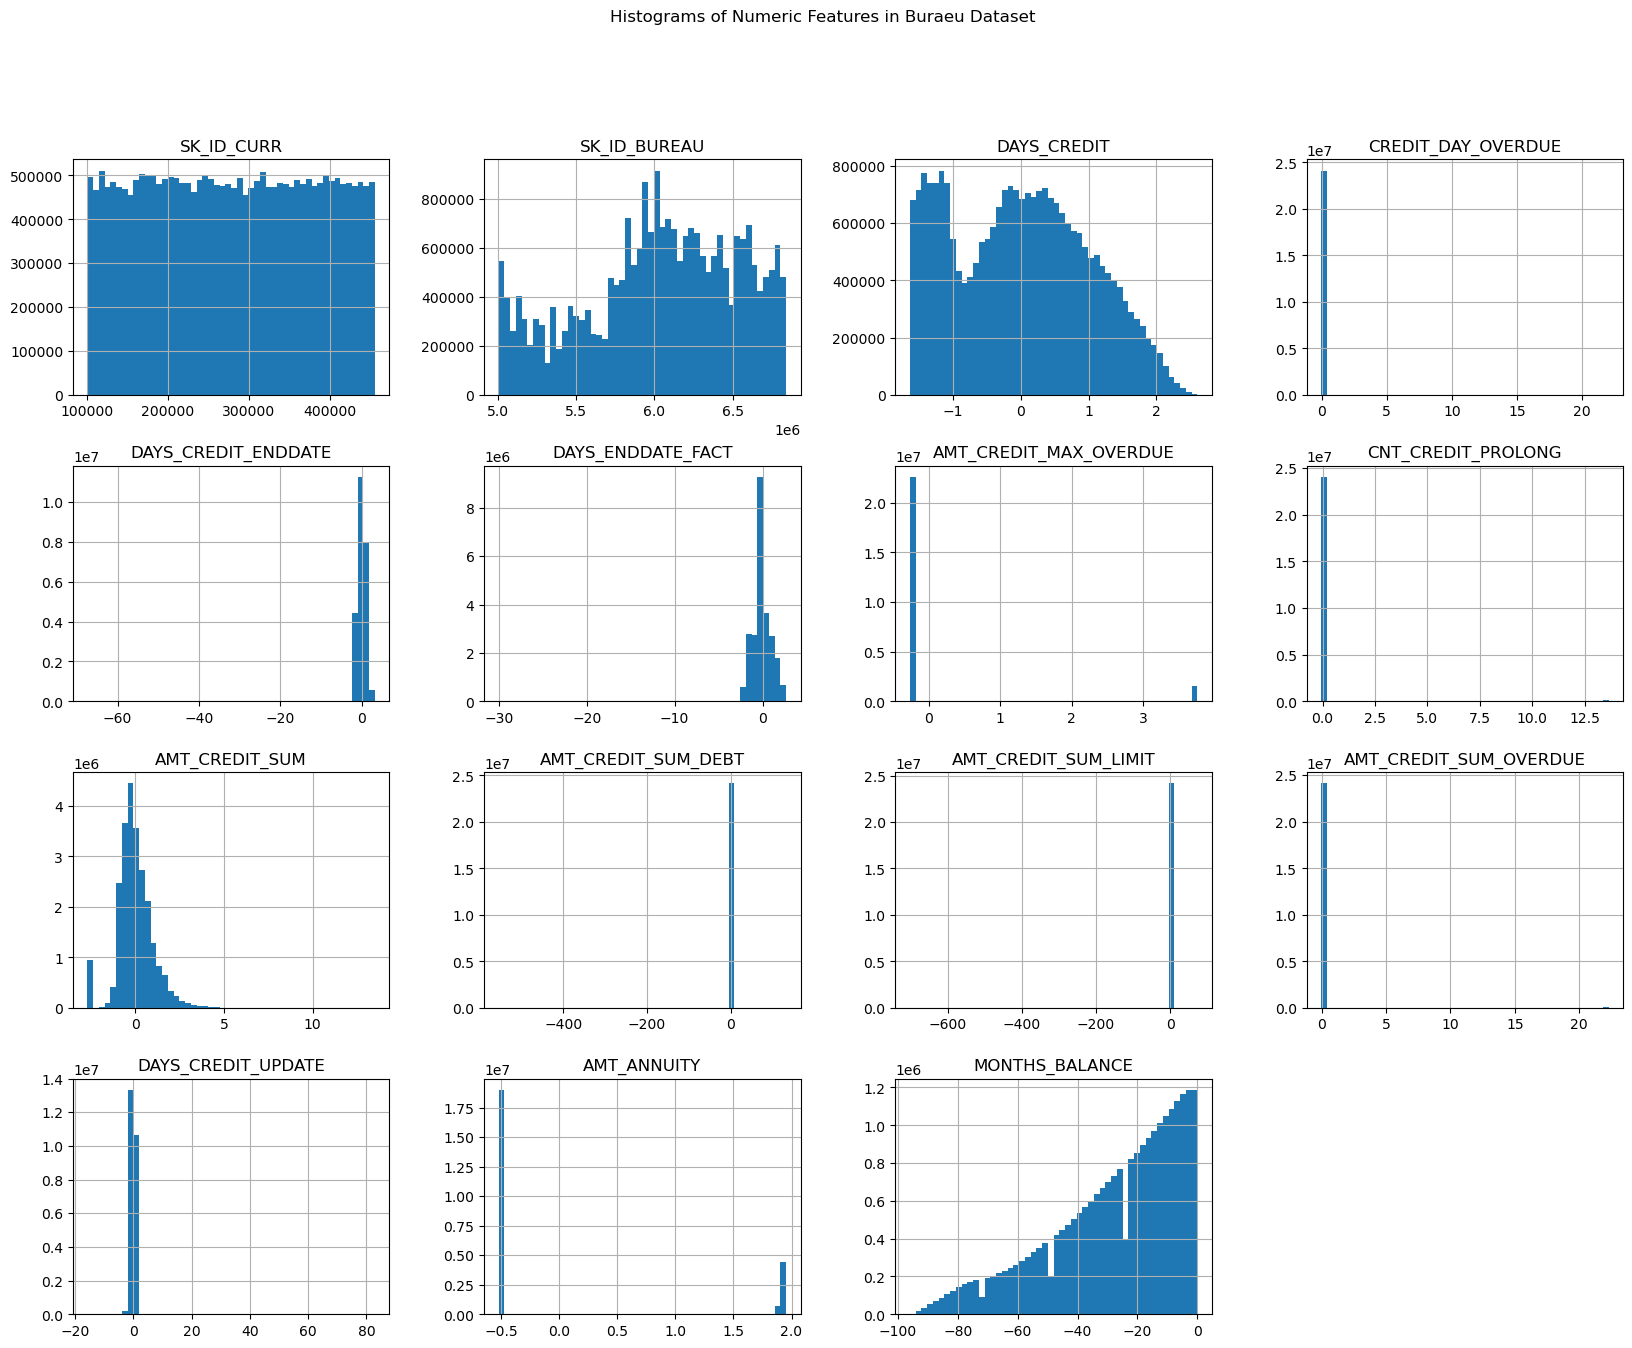

In [16]:
train_bureau_num.hist(bins=50, figsize=(20, 15))
plt.suptitle('Histograms of Numeric Features in Buraeu Dataset')
plt.show()

In [34]:
print(train_bureau.shape)

(24179741, 19)


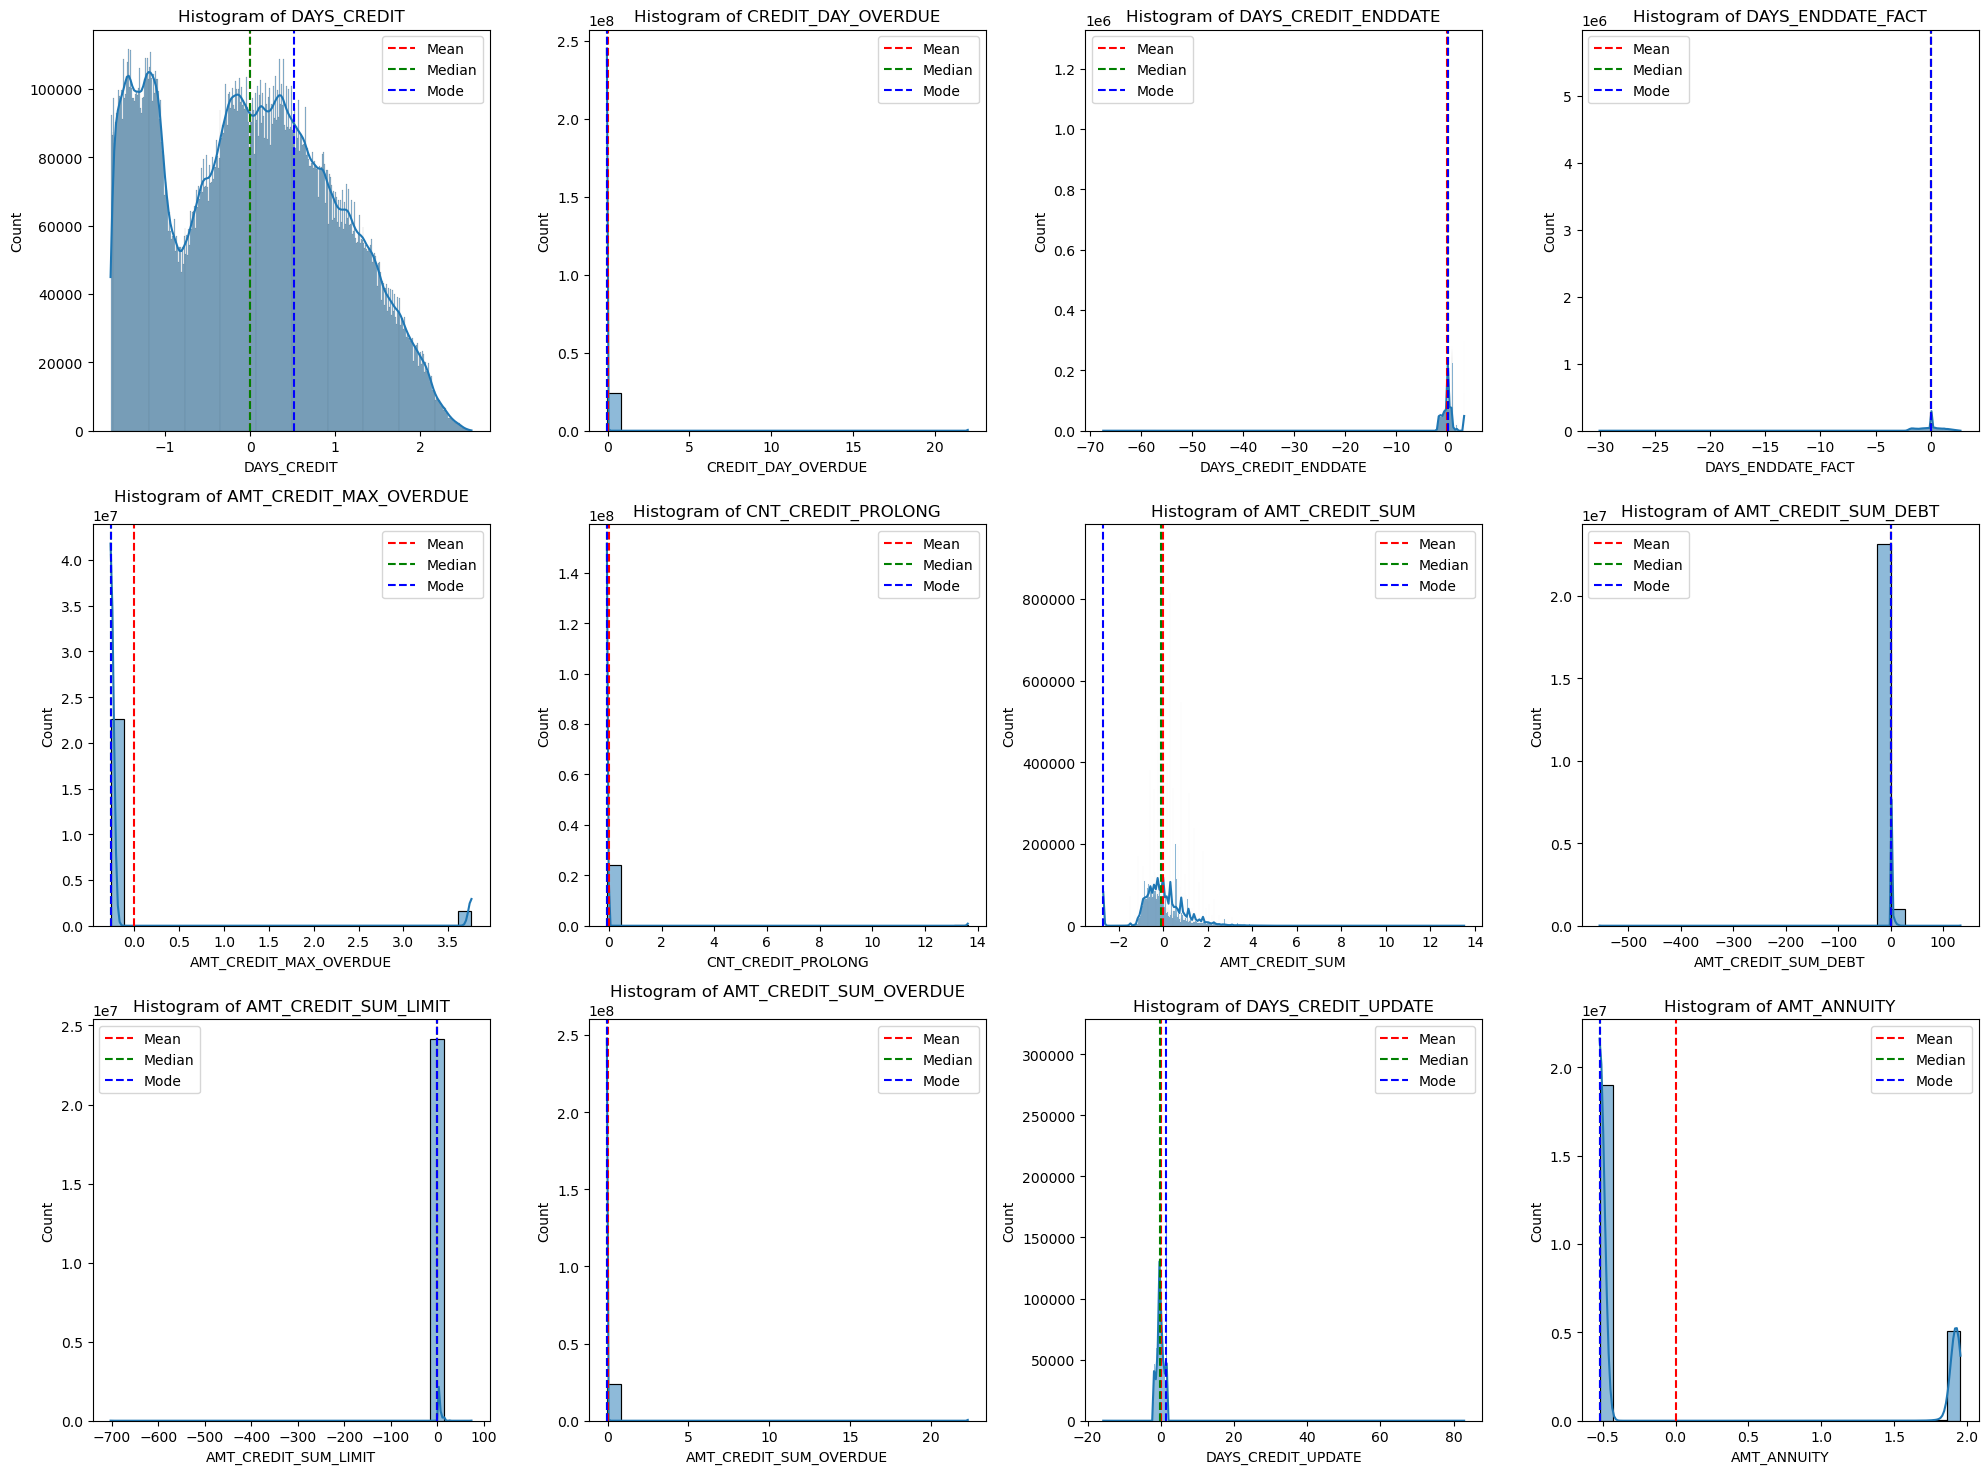

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Membuat 3 baris dan 4 kolom, cukup untuk 12 kolom
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 15))

cols_to_plot = [
    'DAYS_CREDIT', 'CREDIT_DAY_OVERDUE', 'DAYS_CREDIT_ENDDATE', 
    'DAYS_ENDDATE_FACT', 'AMT_CREDIT_MAX_OVERDUE', 'CNT_CREDIT_PROLONG', 
    'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT', 
    'AMT_CREDIT_SUM_OVERDUE', 'DAYS_CREDIT_UPDATE', 'AMT_ANNUITY'
]

for i, col in enumerate(cols_to_plot):
    # Menghitung mean, median, dan mode untuk setiap kolom
    mean_val = train_bureau[col].mean()
    median_val = train_bureau[col].median()
    mode_val = train_bureau[col].mode().iloc[0]

    # Menghitung posisi subplot berdasarkan indeks
    row = i // 4
    col_index = i % 4
    ax = axes[row, col_index]

    # Plot histogram dengan KDE untuk setiap kolom
    sns.histplot(data=train_bureau, x=col, ax=ax, kde=True)
    
    # Menambahkan garis vertikal untuk mean, median, dan mode
    ax.axvline(x=mean_val, color='r', linestyle='dashed', label='Mean')
    ax.axvline(x=median_val, color='g', linestyle='dashed', label='Median')
    ax.axvline(x=mode_val, color='b', linestyle='dashed', label='Mode')

    # Menambahkan judul dan legend
    ax.set_title(f'Histogram of {col}')
    ax.legend()

# Mengatur layout
plt.tight_layout()
plt.show()

In [20]:
train_bureau.head(5)

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY,MONTHS_BALANCE,STATUS
0,380361,5715448,Active,currency 1,1.001935,-0.045408,3.257779,0.015291,-0.266219,-0.073363,-0.402839,-0.14442,2.100965,-0.044884,Credit card,0.874566,-0.52119,0,C
1,380361,5715448,Active,currency 1,1.001935,-0.045408,3.257779,0.015291,-0.266219,-0.073363,-0.402839,-0.14442,2.100965,-0.044884,Credit card,0.874566,-0.52119,1,C
2,380361,5715448,Active,currency 1,1.001935,-0.045408,3.257779,0.015291,-0.266219,-0.073363,-0.402839,-0.14442,2.100965,-0.044884,Credit card,0.874566,-0.52119,2,C
3,380361,5715448,Active,currency 1,1.001935,-0.045408,3.257779,0.015291,-0.266219,-0.073363,-0.402839,-0.14442,2.100965,-0.044884,Credit card,0.874566,-0.52119,3,C
4,380361,5715448,Active,currency 1,1.001935,-0.045408,3.257779,0.015291,-0.266219,-0.073363,-0.402839,-0.14442,2.100965,-0.044884,Credit card,0.874566,-0.52119,4,C


## **Features Encoding**

In [13]:
train_bureau_cat= train_bureau.select_dtypes(include='object')
train_bureau_cat.head(3)

,CREDIT_ACTIVE,CREDIT_CURRENCY,CREDIT_TYPE,STATUS
0,Active,currency 1,Credit card,C
1,Active,currency 1,Credit card,C
2,Active,currency 1,Credit card,C


In [18]:
train_bureau_cat.nunique()

CREDIT_ACTIVE       4
CREDIT_CURRENCY     4
CREDIT_TYPE        14
STATUS              8
dtype: int64

In [22]:
# Daftar kolom yang ingin dilihat nilai uniknya
columns = ['CREDIT_ACTIVE', 'CREDIT_CURRENCY', 'CREDIT_TYPE','STATUS']

# Loop untuk menampilkan nilai unik di setiap kolom
for col in columns:
    print(f"Isi unik dari kolom {col}:")
    print(train_bureau_cat[col].unique())
    print("\n")

Isi unik dari kolom CREDIT_ACTIVE:
['Active' 'Closed' 'Sold' 'Bad debt']


Isi unik dari kolom CREDIT_CURRENCY:
['currency 1' 'currency 2' 'currency 3' 'currency 4']


Isi unik dari kolom CREDIT_TYPE:
['Credit card' 'Consumer credit' 'Car loan' 'Mortgage' 'Microloan'
 'Loan for working capital replenishment' 'Real estate loan'
 'Loan for business development' 'Another type of loan'
 'Unknown type of loan' 'Cash loan (non-earmarked)' 'Mobile operator loan'
 'Loan for the purchase of equipment'
 'Loan for purchase of shares (margin lending)']


Isi unik dari kolom STATUS:
['C' '0' 'X' '1' '2' '5' '4' '3']




**STATUS**

In [14]:
## mengubah c,x dan 0 pada kolom STATUS menjadi 0
'''
karena c dan x sama-sama berstatus tidak telat bayar, maka akan diganti dengan 0.
'''

train_bureau['STATUS'] = train_bureau['STATUS'].replace({'C':0, 'X':0, '0': 0})

In [15]:
train_bureau['STATUS'] = train_bureau['STATUS'].astype('int64')

**CREDIT_CURRENCY**

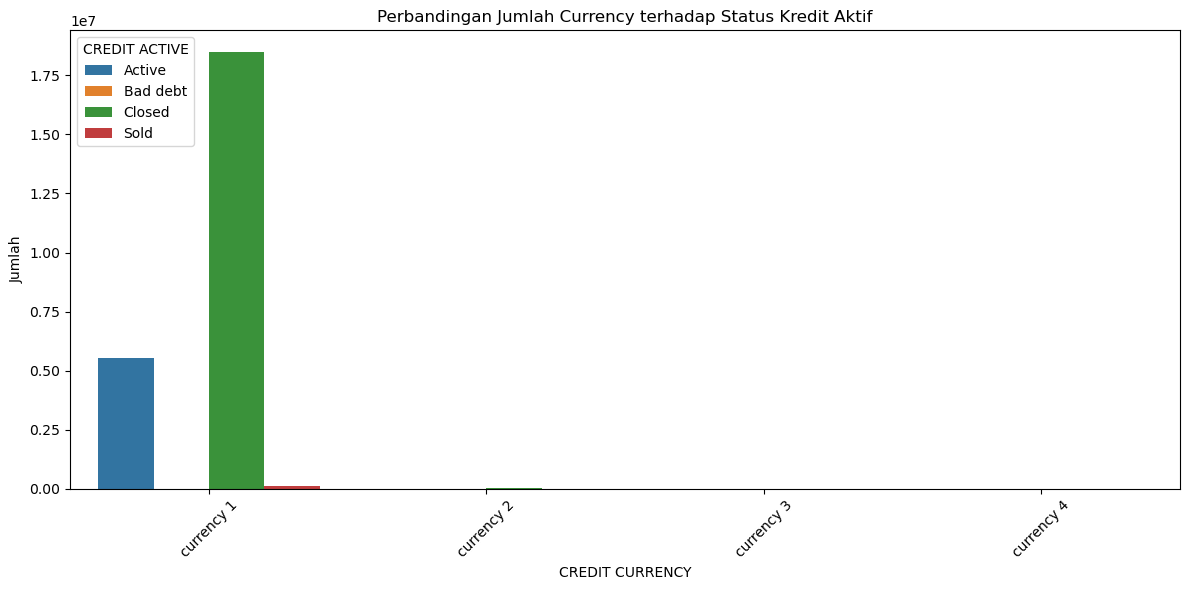

In [25]:
# Hitung jumlah setiap kombinasi dari CREDIT_CURRENCY dan CREDIT_ACTIVE
currency_active_counts = train_bureau.groupby(['CREDIT_CURRENCY', 'CREDIT_ACTIVE']).size().reset_index(name='count')

# Buat grafik
plt.figure(figsize=(12, 6))
sns.barplot(data=currency_active_counts, x='CREDIT_CURRENCY', y='count', hue='CREDIT_ACTIVE')

# Menambahkan judul dan label
plt.title('Perbandingan Jumlah Currency terhadap Status Kredit Aktif')
plt.xlabel('CREDIT CURRENCY')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)  # Memutar label x agar lebih mudah dibaca
plt.legend(title='CREDIT ACTIVE')

# Tampilkan grafik
plt.tight_layout()
plt.show()


Pada kolom CREDIT_CURRENCY, diketahui kredit nasabah hanya tergolong pada mata uang currency1, sedangkan kredit yang menggunakan currency 2 sampai currency 4 sangat kecil atau hampir tidak ada.
Currency 1 mendominasi jumlah kredit yang diberikan dalam kategori Closed (warna hijau), sedangkan status Active (warna biru) memiliki jumlah yang signifikan namun jauh lebih kecil dibandingkan status Closed.

**Keputusan :** <br>
Mengeliminasi currency 2 sampai 4, dengan mengubah menjadi 0.
Mengkonversi currency 1 menjadi bernilai 1.

In [16]:
train_bureau['CREDIT_CURRENCY'] = train_bureau['CREDIT_CURRENCY'].apply(lambda x: 1 if x == 'currency 1' else 0)

**CREDIT_ACTIVE**

Setiap status memiliki tingkat risiko berbeda yang bisa memengaruhi kemampuan bayar nasabah, Ordinal Encoding diterapkan berdasarkan urutan risiko yang logis, seperti: <br>
Active = 1 (risiko terendah) <br>
Closed = 2 <br>
Sold = 3 <br>
Bad debt = 4 (risiko tertinggi)

In [17]:
train_bureau['CREDIT_ACTIVE'] = train_bureau['CREDIT_ACTIVE'].apply(
    lambda x: 1 if x == 'Active' else 2 if x == 'Closed' else 3 if x == 'Sold' else 4 if x == 'Bad debt' else 0)

**CREDIT_TYPE**

* Feature CREDIT_TYPE memiliki banyak kategori, dan Frequency Encoding adalah metode yang baik untuk menekan penambahan jumlah fitur sambil memberikan informasi mengenai seberapa umum setiap kategori.
* Metode Frequency Encoding menggantikan setiap kategori dengan frekuensi kemunculannya dalam dataset, sehingga membantu mengurangi dimensi dibandingkan dengan One-Hot Encoding, yang akan membuat kolom baru untuk setiap kategori unik.
* Dengan Frequency Encoding, kita dapat menjaga kompleksitas model tetap rendah dan memanfaatkan informasi yang relevan dari data kategorikal.
* Feature CREDIT_TYPE dibiarkan tetap ada, namun ketika akan dilakukan permodelan sistem, akan lebih baik untuk di drop terlebih dahulu dan memproses fitur CREDIT_TYPE_Encoded

In [18]:
frequency_encoding = train_bureau['CREDIT_TYPE'].value_counts().to_dict()
train_bureau['CREDIT_TYPE_Encoded'] = train_bureau['CREDIT_TYPE'].map(frequency_encoding)

In [30]:
train_bureau.head(5)

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY,MONTHS_BALANCE,STATUS,CREDIT_TYPE_Encoded
0,380361,5715448,1,1,1.001935,0,3.257779,-1193.0,0.0,0,11.119898,0.0,67500.0,0.0,Credit card,0.874566,0.0,0,0,5019228
1,380361,5715448,1,1,1.001935,0,3.257779,-1193.0,0.0,0,11.119898,0.0,67500.0,0.0,Credit card,0.874566,0.0,-1,0,5019228
2,380361,5715448,1,1,1.001935,0,3.257779,-1193.0,0.0,0,11.119898,0.0,67500.0,0.0,Credit card,0.874566,0.0,-2,0,5019228
3,380361,5715448,1,1,1.001935,0,3.257779,-1193.0,0.0,0,11.119898,0.0,67500.0,0.0,Credit card,0.874566,0.0,-3,0,5019228
4,380361,5715448,1,1,1.001935,0,3.257779,-1193.0,0.0,0,11.119898,0.0,67500.0,0.0,Credit card,0.874566,0.0,-4,0,5019228


In [19]:
train_bureau.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24179741 entries, 0 to 24179740
Data columns (total 20 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           int64  
 3   CREDIT_CURRENCY         int64  
 4   DAYS_CREDIT             float64
 5   CREDIT_DAY_OVERDUE      float64
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      float64
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      float64
 16  AMT_ANNUITY             float64
 17  MONTHS_BALANCE          int64  
 18  STATUS                  int64  
 19  CREDIT_TYPE_Encoded     int64  
dtypes: float64(12), int64(7), object(1)
memory usage: 3.6+ GB


## **Class Imbalance**

**Cek distribusi data**

In [29]:
# Definisikan tipe data numerik
numeric = ['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
train_bureau_num = train_bureau.select_dtypes(include=numeric)
train_bureau_num.head(3)

# Loop melalui setiap kolom dan hitung distribusinya
for col in train_bureau_num.columns:
    print(f"Distribusi untuk kolom {col}:")
    print(train_bureau_num[col].value_counts(normalize=True) * 100)  # Menggunakan normalize untuk persentase
    print("\n")

Distribusi untuk kolom SK_ID_CURR:
SK_ID_CURR
318065    0.011543
260762    0.010989
186249    0.009169
218517    0.008693
364882    0.008027
            ...   
260566    0.000004
148065    0.000004
436821    0.000004
122336    0.000004
205524    0.000004
Name: proportion, Length: 134542, dtype: float64


Distribusi untuk kolom SK_ID_BUREAU:
SK_ID_BUREAU
6116911    0.000401
6324587    0.000401
6151104    0.000401
6288336    0.000401
6020754    0.000401
             ...   
6152745    0.000004
6117603    0.000004
6772802    0.000004
5415695    0.000004
6014955    0.000004
Name: proportion, Length: 774354, dtype: float64


Distribusi untuk kolom CREDIT_ACTIVE:
CREDIT_ACTIVE
2    76.559352
1    22.935283
3     0.504952
4     0.000414
Name: proportion, dtype: float64


Distribusi untuk kolom CREDIT_CURRENCY:
CREDIT_CURRENCY
1    99.870441
0     0.129559
Name: proportion, dtype: float64


Distribusi untuk kolom DAYS_CREDIT:
DAYS_CREDIT
 0.520235    0.060464
 0.198231    0.058255
-1.162240    

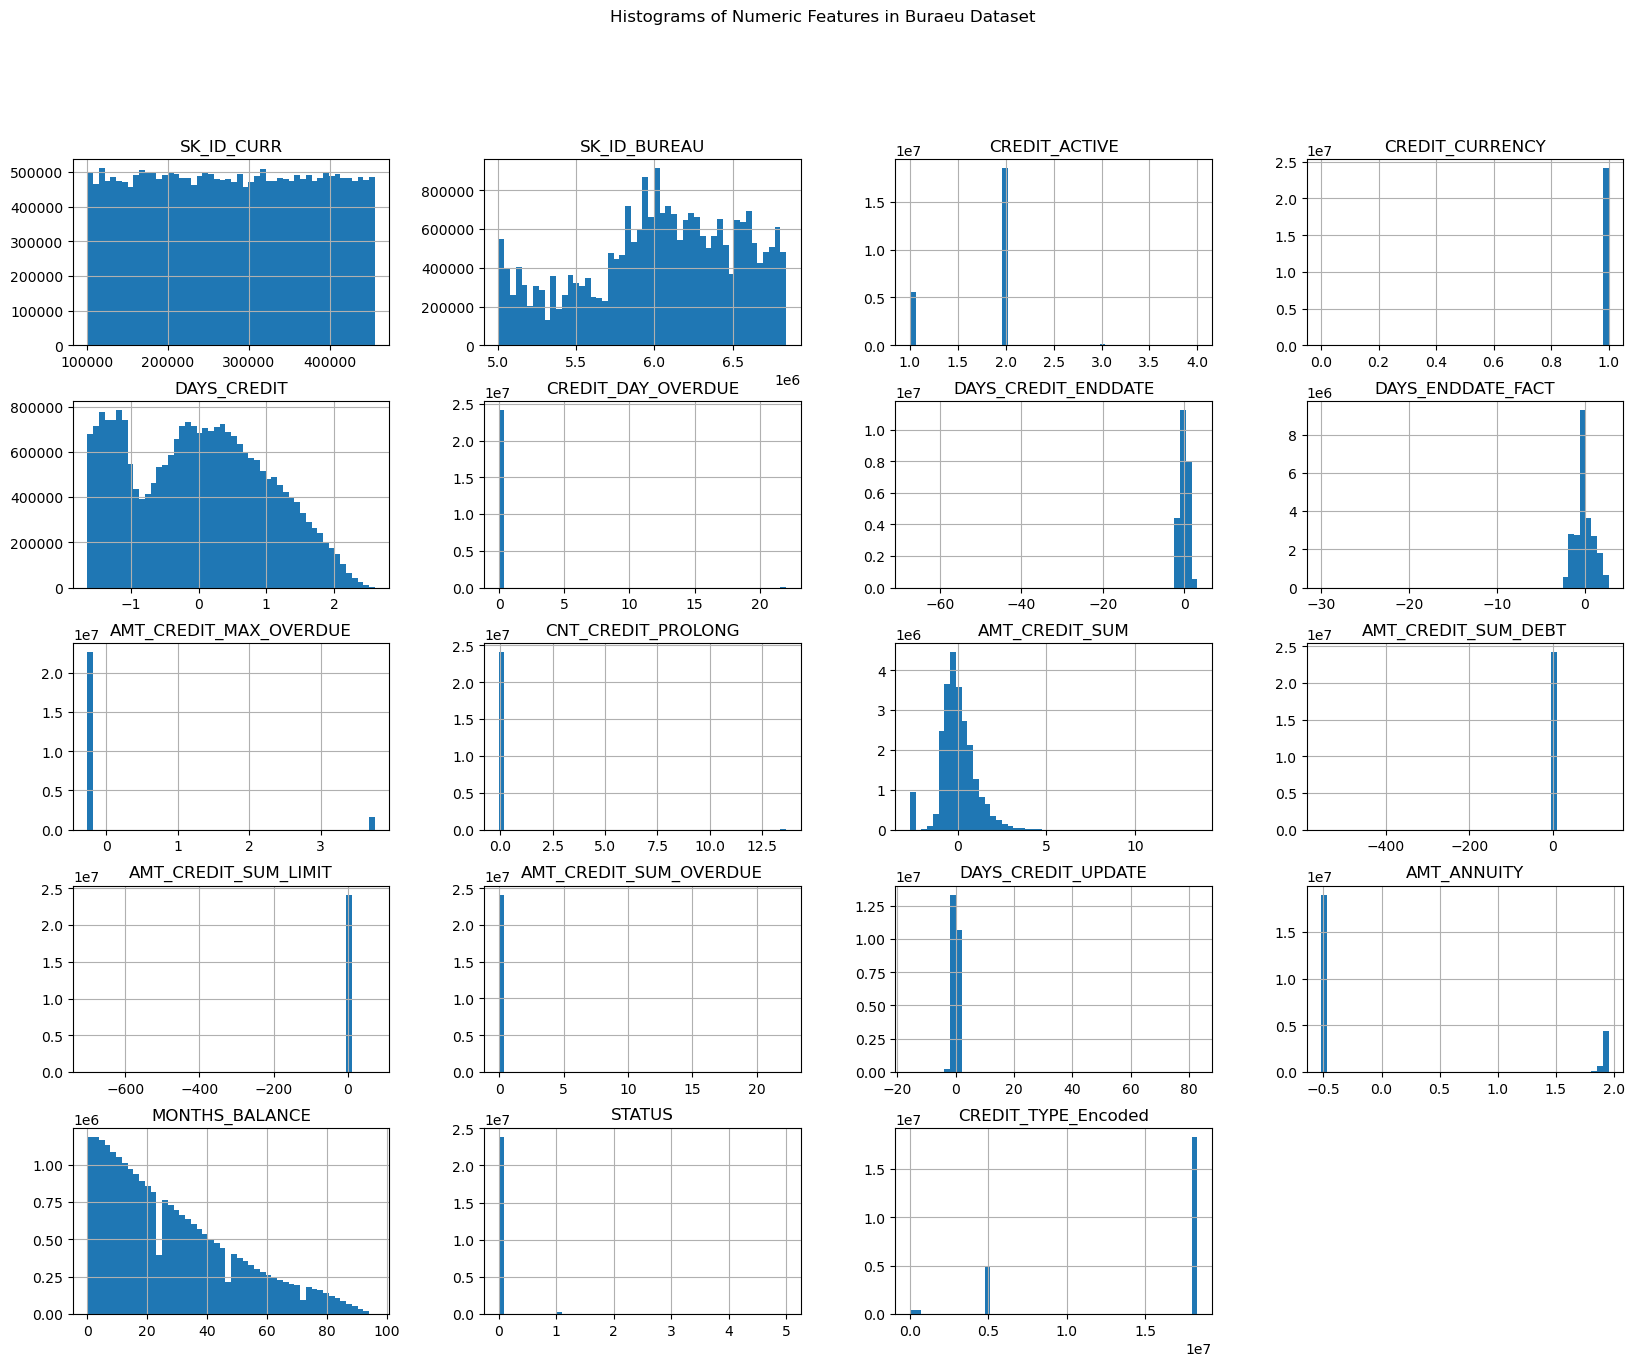

In [30]:
# Definisikan tipe data numerik
numeric = ['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
train_bureau_num = train_bureau.select_dtypes(include=numeric)
train_bureau_num.head(3)

train_bureau_num.hist(bins=50, figsize=(20, 15))
plt.suptitle('Histograms of Numeric Features in Buraeu Dataset')
plt.show()

**Handling Class Imbalance - CREDIT_DAY_OVERDUE**

In [20]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Mengatur fitur dan target
X = train_bureau.drop(['CREDIT_DAY_OVERDUE', 'CREDIT_TYPE'], axis=1)  # Hapus kolom target dan credit type
y = train_bureau['CREDIT_DAY_OVERDUE']

# Kategorisasi target
y_categorized = (y > 0).astype(int)  # 1 jika tidak bayar, 0 jika bayar

# Mengubah tipe data menjadi float32 untuk menghemat memori
X = X.astype('float32')

# Membagi dataset menjadi data train dan data test
X_train, X_test, y_train, y_test = train_test_split(X, y_categorized, test_size=0.2, random_state=42)

# Menerapkan SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Mengupdate dataframe train_bureau dengan hasil SMOTE
train_bureau.loc[X_train.index, X.columns] = X_resampled
train_bureau.loc[X_train.index, 'CREDIT_DAY_OVERDUE'] = y_resampled

# Tampilkan hasil
print("\nDataframe setelah penerapan SMOTE:")
print(train_bureau.head())


Dataframe setelah penerapan SMOTE:
   SK_ID_CURR  SK_ID_BUREAU  CREDIT_ACTIVE  CREDIT_CURRENCY  DAYS_CREDIT  \
0    426461.0     5068429.0            2.0                1    -1.375067   
1    456209.0     6664549.0            2.0                1     0.161238   
2    186568.0     5011668.0            2.0                1    -0.096972   
3    395335.0     6837060.0            2.0                1     1.284402   
4    110136.0     6653441.0            2.0                1    -0.104637   

   CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0                 0.0             0.056853          -1.824708   
1                 0.0            -0.224229           0.131816   
2                 0.0            -0.305345          -0.529800   
3                 0.0             0.658069           1.671173   
4                 0.0            -0.509325          -0.367216   

   AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
0               -0.266219           -0.073363      

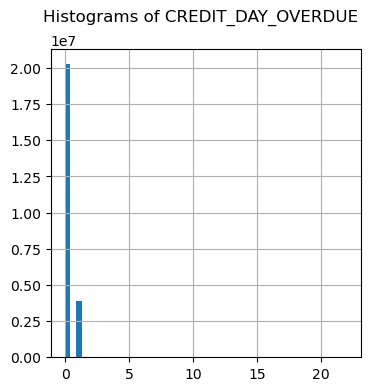

In [56]:
train_bureau['CREDIT_DAY_OVERDUE'].hist(bins=50, figsize=(4, 4))
plt.suptitle('Histograms of CREDIT_DAY_OVERDUE')
plt.show()

In [57]:
train_bureau['CREDIT_DAY_OVERDUE'].value_counts()

CREDIT_DAY_OVERDUE
 0.000000     15442268
-0.045408      4825888
 1.000000      3901524
 22.022395       10061
Name: count, dtype: int64

## **Features Extraction**

## **Features Selection**

In [23]:
# Definisikan tipe data numerik
numeric = ['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
train_bureau_num = train_bureau.select_dtypes(include=numeric)
train_bureau_num.head(3)

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,AMT_ANNUITY,MONTHS_BALANCE,STATUS,CREDIT_TYPE_Encoded
0,426461.0,5068429.0,2.0,1,-1.375067,0.0,0.056853,-1.824708,-0.266219,-0.073363,-0.607010,-0.14442,-0.072112,-0.044884,-1.654781,-0.52119,62.0,0.0,18333668.0
1,456209.0,6664549.0,2.0,1,0.161238,0.0,-0.224229,0.131816,-0.266219,-0.073363,-0.145083,-0.14442,-0.072112,-0.044884,-0.558777,-0.52119,5.0,0.0,18333668.0
2,186568.0,5011668.0,2.0,1,-0.096972,0.0,-0.305345,-0.529800,-0.266219,-0.073363,0.314136,-0.14442,-0.072112,-0.044884,-1.012715,-0.52119,29.0,0.0,5019228.0


### **1. Recursive Feature Elimination (RFE)**

In [71]:
train_bureau.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24179741 entries, 0 to 24179740
Data columns (total 20 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              float64
 1   SK_ID_BUREAU            float64
 2   CREDIT_ACTIVE           float64
 3   CREDIT_CURRENCY         int64  
 4   DAYS_CREDIT             float64
 5   CREDIT_DAY_OVERDUE      float64
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      float64
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      float64
 16  AMT_ANNUITY             float64
 17  MONTHS_BALANCE          float64
 18  STATUS                  float64
 19  CREDIT_TYPE_Encoded     float64
dtypes: float64(18), int64(1), object(1)
memory usage: 3.6+ GB


In [26]:
from xgboost import XGBRegressor
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split

# Konversi tipe data ke float32 untuk mengurangi penggunaan memori
X = train_bureau.drop(['CREDIT_DAY_OVERDUE', 'CREDIT_TYPE'], axis=1).astype('float32')
y = train_bureau['CREDIT_DAY_OVERDUE'].astype('float32')

# Split data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi model XGBRegressor dengan n_jobs=-1 untuk mengoptimalkan penggunaan CPU
model = XGBRegressor(random_state=42, n_jobs=-1)

# Inisialisasi RFE dengan jumlah fitur yang ingin dipilih
n_features_to_select = 18 
rfe = RFE(estimator=model, n_features_to_select=n_features_to_select)

# Fit RFE pada data training
rfe.fit(X_train, y_train)

# Melihat fitur yang dipilih oleh RFE
selected_features = X.columns[rfe.support_]
print("Fitur yang dipilih oleh RFE:", selected_features)

# Melihat ranking dari semua fitur
feature_ranking = dict(zip(X.columns, rfe.ranking_))
print("Ranking fitur:", feature_ranking)


Fitur yang dipilih oleh RFE: Index(['SK_ID_CURR', 'SK_ID_BUREAU', 'CREDIT_ACTIVE', 'CREDIT_CURRENCY',
       'DAYS_CREDIT', 'DAYS_CREDIT_ENDDATE', 'DAYS_ENDDATE_FACT',
       'AMT_CREDIT_MAX_OVERDUE', 'CNT_CREDIT_PROLONG', 'AMT_CREDIT_SUM',
       'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT', 'AMT_CREDIT_SUM_OVERDUE',
       'DAYS_CREDIT_UPDATE', 'AMT_ANNUITY', 'MONTHS_BALANCE', 'STATUS',
       'CREDIT_TYPE_Encoded'],
      dtype='object')
Ranking fitur: {'SK_ID_CURR': 1, 'SK_ID_BUREAU': 1, 'CREDIT_ACTIVE': 1, 'CREDIT_CURRENCY': 1, 'DAYS_CREDIT': 1, 'DAYS_CREDIT_ENDDATE': 1, 'DAYS_ENDDATE_FACT': 1, 'AMT_CREDIT_MAX_OVERDUE': 1, 'CNT_CREDIT_PROLONG': 1, 'AMT_CREDIT_SUM': 1, 'AMT_CREDIT_SUM_DEBT': 1, 'AMT_CREDIT_SUM_LIMIT': 1, 'AMT_CREDIT_SUM_OVERDUE': 1, 'DAYS_CREDIT_UPDATE': 1, 'AMT_ANNUITY': 1, 'MONTHS_BALANCE': 1, 'STATUS': 1, 'CREDIT_TYPE_Encoded': 1}


### **2. Feature Importance**

Feature Importance berdasarkan XGBoost:
                   Feature  Importance
12  AMT_CREDIT_SUM_OVERDUE    0.924392
2            CREDIT_ACTIVE    0.035644
6        DAYS_ENDDATE_FACT    0.010351
17     CREDIT_TYPE_Encoded    0.009014
10     AMT_CREDIT_SUM_DEBT    0.002934
16                  STATUS    0.002830
13      DAYS_CREDIT_UPDATE    0.002620
7   AMT_CREDIT_MAX_OVERDUE    0.002292
4              DAYS_CREDIT    0.002269
0               SK_ID_CURR    0.001601
5      DAYS_CREDIT_ENDDATE    0.001575
1             SK_ID_BUREAU    0.001235
9           AMT_CREDIT_SUM    0.001209
14             AMT_ANNUITY    0.001144
11    AMT_CREDIT_SUM_LIMIT    0.000556
15          MONTHS_BALANCE    0.000297
3          CREDIT_CURRENCY    0.000029
8       CNT_CREDIT_PROLONG    0.000007


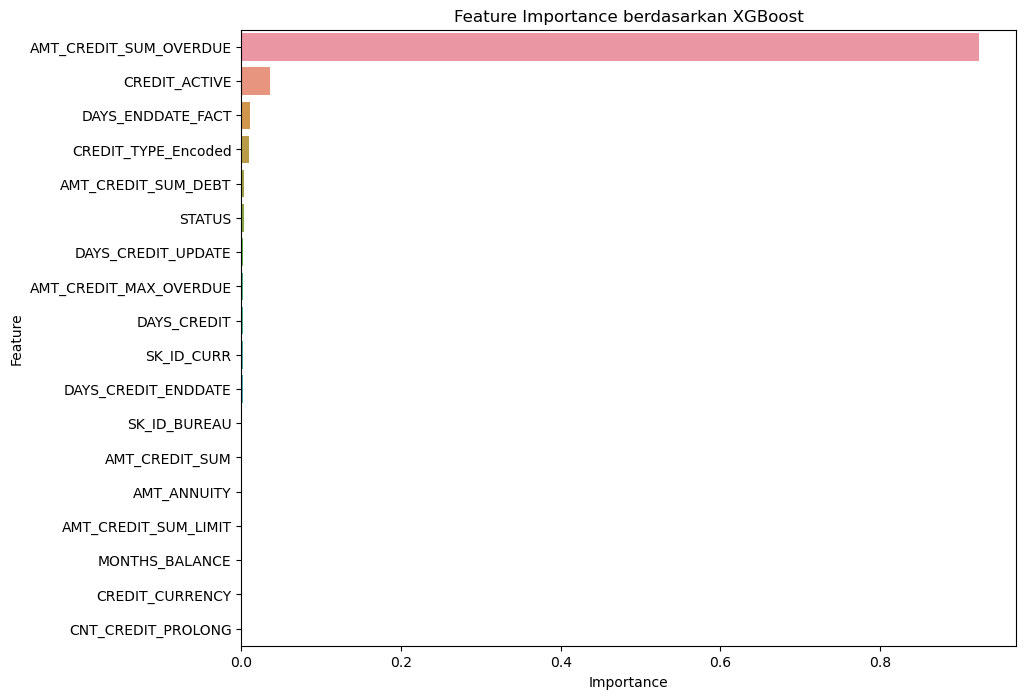

In [25]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Definisikan X dan y
X = train_bureau.drop(['CREDIT_DAY_OVERDUE', 'CREDIT_TYPE'], axis=1)  # Ganti 'TARGET' dengan nama kolom target Anda
y = train_bureau['CREDIT_DAY_OVERDUE']

# Split data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi model XGBoost
model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Fit model pada seluruh data
model.fit(X_train, y_train)

# Mendapatkan feature importance
feature_importance = model.feature_importances_

# Membuat DataFrame untuk melihat hasil feature importance secara terurut
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

print("Feature Importance berdasarkan XGBoost:")
print(feature_importance_df)

# Plot Feature Importance
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title("Feature Importance berdasarkan XGBoost")
plt.show()


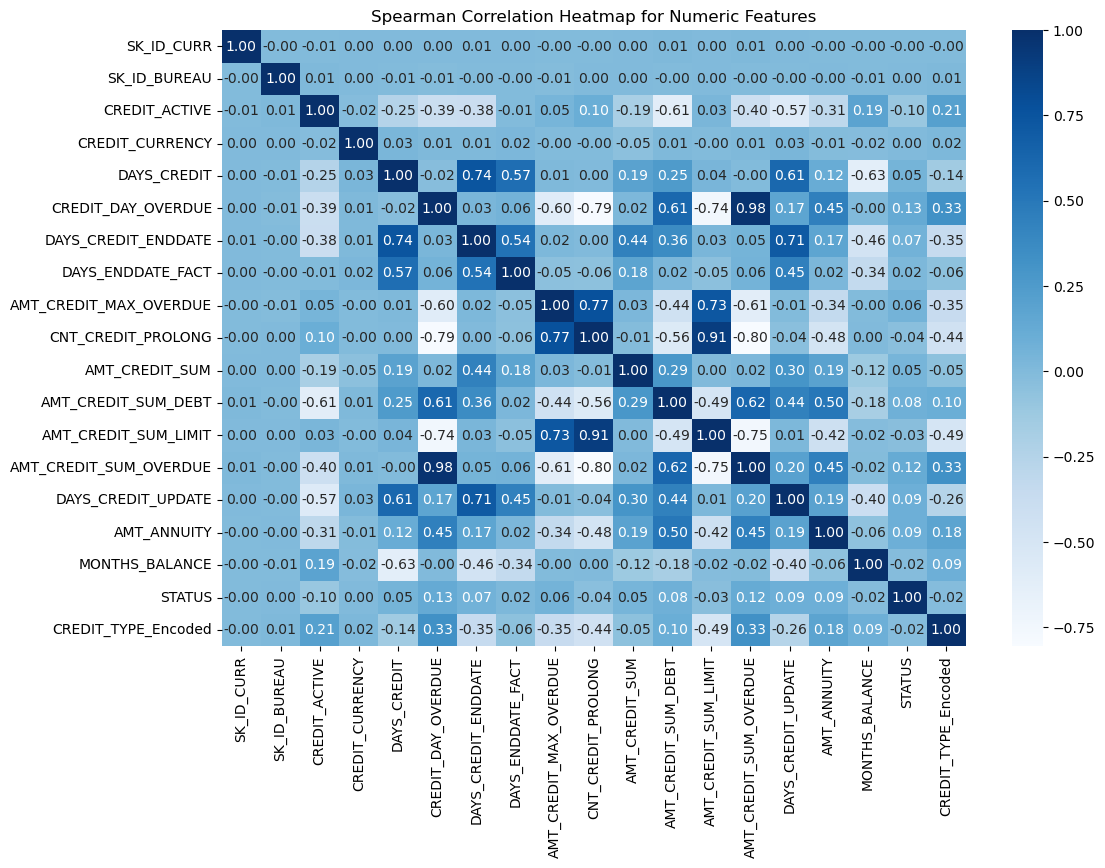

In [24]:
correlation_matrix_spearman = train_bureau_num.corr(method='spearman')

# Membuat heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_spearman, annot=True, cmap='Blues', fmt=".2f")
plt.title('Spearman Correlation Heatmap for Numeric Features')
plt.show()

**Feature yang akan dihapus antara lain :** <br>
1.	CREDIT_CURRENCY : Fitur initidak relevan karena informasi tentang mata uang tidak memiliki dampak signifikan pada kemampuan nasabah dalam melunasi pinjaman.<br>
2.	SK_ID_BUREAU : ID ini hanya relevan dalam dataset Bureau dan Bureau_Balance, dan SK_ID_CURR sudah ada sebagai identifikasi nasabah dan terdapat di semua dataset. Sehingga dapat diabaikan untuk analisis ini.<br>
3.	MONTHS_BALANCE : Fitur ini tidak memberikan informasi tambahan yang berharga untuk model prediksi, serta tidak berkorelasi kuat dengan target.<br>
4.	AMT_CREDIT_SUM : Fitur ini dapat menyebabkan redundansi dengan fitur lain, seperti AMT_CREDIT_SUM_DEBT.<br>
5.	CREDIT_TYPE : Karena sudah ada feature CREDIT_TYPE yang berisikan informasi tipe kredit dalam bentuk numerik.<br>